In [69]:
#Importation des bibliothèques NumPy, Pandas et Matplotlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
# Chargement des données de ventes mensuelles à partir d'un fichier CSV ou Excel

data_vente = pd.read_csv("data\data_vente.csv")

In [71]:
# Explorons les données pour comprendre leur contenu. Vérifions s'il y a des données manquantes ou des valeurs aberrantes

data_vente.describe()

,Units Sold,Revenue
count,588.000000,588.000000
mean,489.673469,31221.428571
std,343.815948,27426.671012
min,100.000000,3000.000000
25%,255.000000,12400.000000
50%,382.500000,24000.000000
75%,600.000000,41337.500000
max,2100.000000,210000.000000


In [82]:
# Explorons les données pour comprendre leur structure . Vérifions s'il y a des données manquantes ou des valeurs aberrantes

data_vente.info()

# Vérifions s'il y a des données manquantes

print(data_vente.isnull().sum())
print ("Il n'y a pas de valeurs manquantes")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       588 non-null    object
 1   Product     588 non-null    object
 2   Units Sold  588 non-null    int64 
 3   Revenue     588 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.5+ KB
Month         0
Product       0
Units Sold    0
Revenue       0
dtype: int64
Il n'y a pas de valeurs manquantes


In [104]:
# Calculons les ventes totales pour chaque mois

ventes_totales_par_mois = data_vente.groupby('Month')[['Revenue']].sum()
ventes_totales_par_mois.sort_values('Revenue')

,Revenue
Month,
January,987000
February,1085700
March,1184400
April,1283100
May,1381800
June,1480500
July,1579200
August,1677900
September,1776600


In [131]:
# Identifions les 5 produits les plus vendus chaque mois

ventes_par_produit = data_vente.groupby(['Month', 'Product'])['Units Sold'].sum()
top_5_produits = ventes_par_produit.groupby('Month', group_keys=False).nlargest(5)
top_5

Month      Product   
April      Smartphone    1300
           Headphones    1040
           Power Bank    1040
           Monitor        910
           USB Cable      910
August     Smartphone    1700
           Headphones    1360
           Power Bank    1360
           Monitor       1190
           USB Cable     1190
December   Smartphone    2100
           Headphones    1680
           Power Bank    1680
           Monitor       1470
           USB Cable     1470
February   Smartphone    1100
           Headphones     880
           Power Bank     880
           Monitor        770
           USB Cable      770
January    Smartphone    1000
           Headphones     800
           Power Bank     800
           Monitor        700
           USB Cable      700
July       Smartphone    1600
           Headphones    1280
           Power Bank    1280
           Monitor       1120
           USB Cable     1120
June       Smartphone    1500
           Headphones    1200
           Power B

In [75]:
# Trouvez les mois avec les ventes les plus élevées et les plus basses 

# Mois avec les ventes les plus élevées

moyenne_ventes = ventes_totales_par_mois.mean()
mois_ventes_max = ventes_totales_par_mois[ventes_totales_par_mois > moyenne_ventes].idxmax()
print("Le mois avec les ventes les plus élevées :", mois_ventes_max)

# Mois avec les ventes les plus basses
mois_ventes_min = ventes_totales_par_mois[ventes_totales_par_mois < moyenne_ventes].idxmin()
print("Le mois avec les ventes les plus basses :", mois_ventes_min)

Le mois avec les ventes les plus élevées : Revenue    December
dtype: object
Le mois avec les ventes les plus basses : Revenue    January
dtype: object


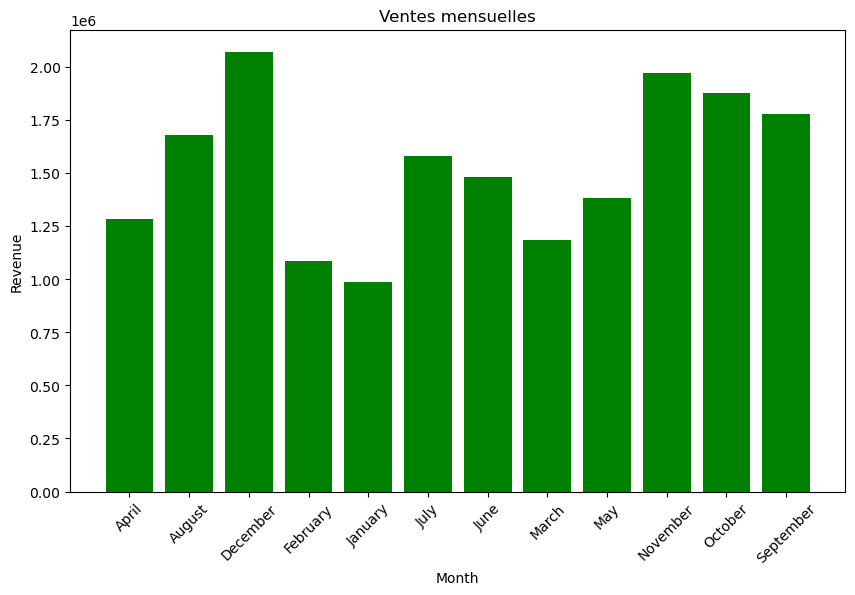

In [112]:
# Utilisons Matplotlib pour créer des graphiques représentant les ventes mensuelles

# Graphique à barres pour les ventes mensuelles
valeurs_ventes = ventes_totales_par_mois['Revenue'].values
plt.figure(figsize=(10, 6))
plt.bar(ventes_totales_par_mois.index, valeurs_ventes, color='green')
plt.title('Ventes mensuelles')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

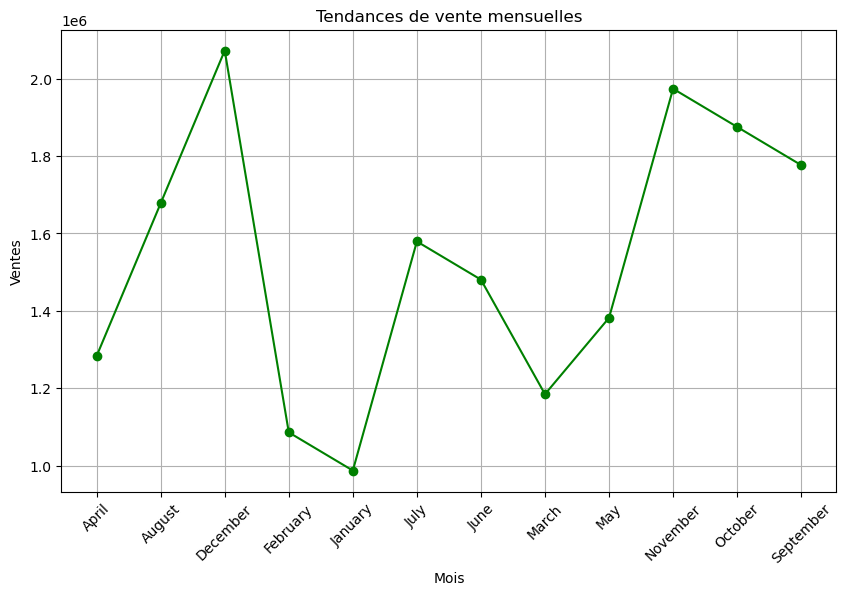

In [111]:
# Graphiques supplémentaires pour mettre en évidence les tendances de vente et les produits les plus populaires. 

# Graphique de tendance de vente mensuelle

plt.figure(figsize=(10, 6))
plt.plot(ventes_totales_par_mois.index, ventes_totales_par_mois.values, marker='o', color='green')
plt.title('Tendances de vente mensuelles')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




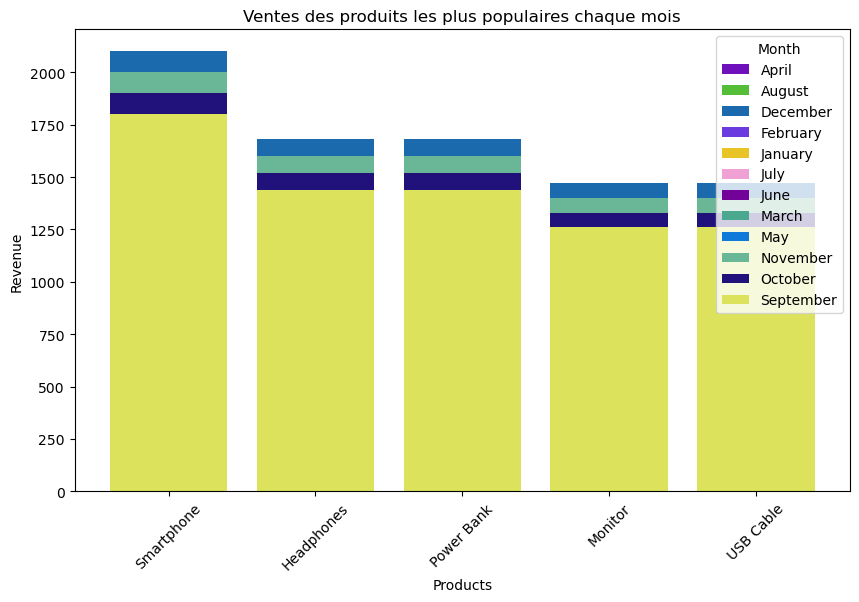

In [137]:
# Graphique des ventes des produits les plus populaires pour chaque mois

plt.figure(figsize=(10, 6))
for month, products in top_5_produits.groupby(level=0):
    product_names = [product[1] for product in products.index]
    sales_values = products.values
    plt.bar(product_names, sales_values, color=np.random.rand(3,), label=month)
plt.title('Ventes des produits les plus populaires chaque mois')
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.legend(title='Month')
plt.xticks(rotation=45)
plt.show()